# Question 3 a

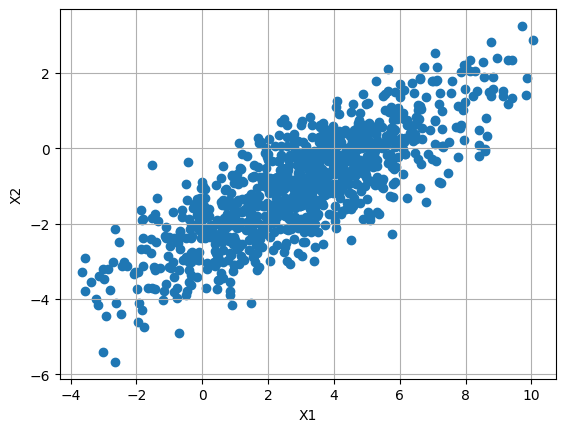

In [9]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000

mean_matrix_x = np.array([3, -1])
covariance_matrix_x = np.array([[7, 3], [3, 2]])

a = np.random.randn(2, n)

lin_transform = np.linalg.cholesky((covariance_matrix_x))
x = np.dot(lin_transform, a) + mean_matrix_x[:, np.newaxis]

X1 = x[0, :]
X2 = x[1, :]

plt.scatter(X1, X2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

# Question 4 b and c

In [15]:
def classifier(x):
    # calculate the log likelihood
    log_likelihood_class0 = -0.5 * np.sum((x - mu0) @ np.linalg.inv(cov0) * (x - mu0), axis=1) - 0.5 * np.log(np.linalg.det(cov0))
    log_likelihood_class1 = -0.5 * np.sum((x - mu1) @ np.linalg.inv(cov1) * (x - mu1), axis=1) - 0.5 * np.log(np.linalg.det(cov1))

    predicted_class = np.where(log_likelihood_class0 > log_likelihood_class1, 0, 1)

    return predicted_class

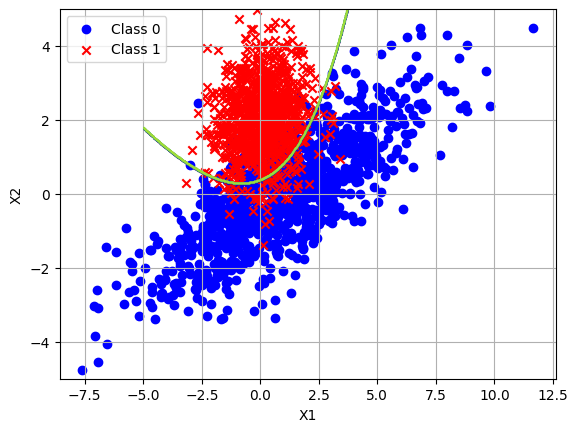

In [16]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000

mu0 = np.array([1, 0])
cov0 = np.array([[8, 3], [3, 2]])

mu1 = np.array([0, 2])
cov1 = np.array([[1, 0.1], [0.1, 1]])

class_0_points = np.random.multivariate_normal(mu0, cov0, n)
class_1_points = np.random.multivariate_normal(mu1, cov1, n)

predicted_class0 = classifier(class_0_points)
predicted_class1 = classifier(class_1_points)

plt.scatter(class_0_points[:, 0], class_0_points[:, 1], c='b', marker='o', label='Class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], c='r', marker='x', label='Class 1')

# plot the decision boundary
x_boundary = np.linspace(-5, 5, 400)
y_boundary = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_boundary, y_boundary)
boundary_pts = np.column_stack((X.ravel(), Y.ravel()))
predicted_boundary = classifier(boundary_pts)
plt.contour(X, Y, predicted_boundary.reshape(X.shape))

plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)

plt.show()

In [17]:
misclassified_points = np.sum(predicted_class0 == 1) + np.sum(predicted_class1 == 0)

total_points = 2 * n  # Total number of points
empirical_risk = misclassified_points / total_points

print("Number of misclassified points:", misclassified_points)
print("Empirical risk of the classifier:", empirical_risk)


Number of misclassified points: 162
Empirical risk of the classifier: 0.081
